# Visualization of Job Life Cycle Data

This is the second notebook. It does the analysis and creates the visualization.

In [1]:
# Import libraries
import plotly.graph_objects as go
import pandas as pd
import requests

## Import Data from GitHub Repo

In [4]:
repo_owner = 'rlucas49'
repo_name = 'EndToEnd_Project1_DataScienceJobSearch'
file_name = 'InputDataForSankey.csv'

url = f'https://raw.githubusercontent.com/{repo_owner}/{repo_name}/refs/heads/main/{file_name}'
response = requests.get(url)

pdf_data = pd.read_csv(url)#, index_col=0) 
pdf_data

,source,target,value
0,Applications,No response,73
1,Applications,Rejection notice,59
2,Applications,Recruiter call,18
3,Recruiter call,Wrong role/fit/WLB/pay,5
4,Recruiter call,Tech screen,13
5,Tech screen,Hiring freeze,3
6,Tech screen,Failed,2
7,Tech screen,On-site/Final,8
8,On-site/Final,Reject,4
9,On-site/Final,Offer,0


## Compile Data

In [5]:
# Create list of unique nodes (preserve order of appearance for consistency)
all_nodes = pd.unique(pdf_data[['source', 'target']].values.ravel()) #elegant
print(all_nodes)

# Map node labels to indices
node_index = {label: i for i, label in enumerate(all_nodes)}
print(node_index)

['Applications' 'No response' 'Rejection notice' 'Recruiter call'
 'Wrong role/fit/WLB/pay' 'Tech screen' 'Hiring freeze' 'Failed'
 'On-site/Final' 'Reject' 'Offer' 'Pending']
{'Applications': 0, 'No response': 1, 'Rejection notice': 2, 'Recruiter call': 3, 'Wrong role/fit/WLB/pay': 4, 'Tech screen': 5, 'Hiring freeze': 6, 'Failed': 7, 'On-site/Final': 8, 'Reject': 9, 'Offer': 10, 'Pending': 11}


In [6]:
# Build source, target, value lists
sources = pdf_data["source"].map(node_index)
targets = pdf_data["target"].map(node_index)
values = pdf_data["value"]
print("sources:\n", sources)
print("targets:\n", targets)
print("values:\n", values)

sources:
 0     0
1     0
2     0
3     3
4     3
5     5
6     5
7     5
8     8
9     8
10    8
Name: source, dtype: int64
targets:
 0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
Name: target, dtype: int64
values:
 0     73
1     59
2     18
3      5
4     13
5      3
6      2
7      8
8      4
9      0
10     4
Name: value, dtype: int64


In [7]:
# Build counts for the labels
pdf_labels = pd.DataFrame()
for i in range(len(all_nodes)):
    if i == 0:
        pdf_labels.loc[i,'node'] = all_nodes[i]
        pdf_labels.loc[i,'count'] = sum(pdf_data[pdf_data['source']==all_nodes[i]]['value'])
    else:
        pdf_labels.loc[i,'node'] = all_nodes[i]
        pdf_labels.loc[i,'count'] = (values[i-1])
pdf_labels = pdf_labels.set_index('node')
pdf_labels['count'] = pdf_labels['count'].astype(int)
pdf_labels

,count
node,
Applications,150
No response,73
Rejection notice,59
Recruiter call,18
Wrong role/fit/WLB/pay,5
Tech screen,13
Hiring freeze,3
Failed,2
On-site/Final,8


In [8]:
pdf_labels.loc[['Failed']]['count']

node
Failed    2
Name: count, dtype: int64

In [9]:
# Create formatted labels for visualization
formatted_labels = [f"{name} ({value})" for name, value in zip(all_nodes, pdf_labels['count'])]
formatted_labels

['Applications (150)',
 'No response (73)',
 'Rejection notice (59)',
 'Recruiter call (18)',
 'Wrong role/fit/WLB/pay (5)',
 'Tech screen (13)',
 'Hiring freeze (3)',
 'Failed (2)',
 'On-site/Final (8)',
 'Reject (4)',
 'Offer (0)',
 'Pending (4)']

## Create Visualization

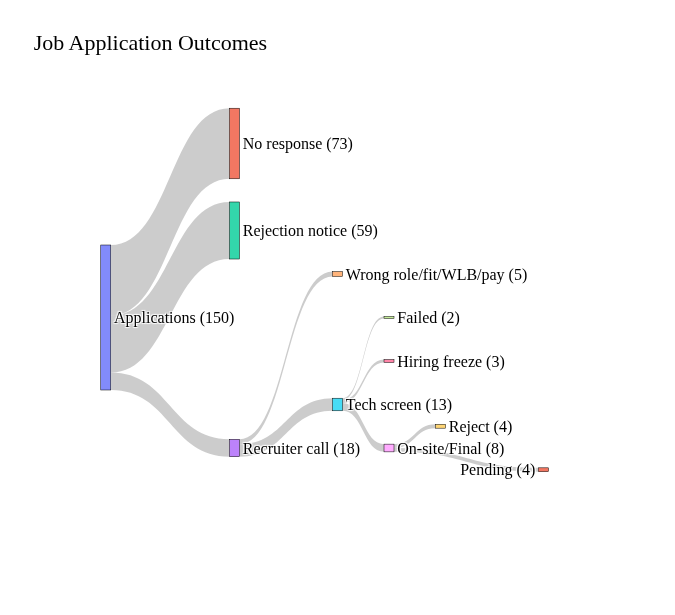

In [10]:
# Create Sankey plot
fig = go.Figure(data=[go.Sankey(
    arrangement="fixed", #[snap, perpendicular, freeform, fixed]
    node=dict(
        pad=80,
        thickness=10, #
        line=dict(color="black", width=0.5),
        label=formatted_labels,
        x=[0.05,0.3,0.3,0.3,0.5,0.5,0.6,0.60,0.60,0.70,0.90,0.9], #values are 0-1
        y=[0.50,0.1,0.3,0.8,0.4,0.7,0.6,0.50,0.80,0.75,0.85,0.9] #y=1 is the bottom
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
)])

fig.update_layout(title_text="Job Application Outcomes", font_size=12,
    font=dict(size=16, family="Arial Black", color="black"),
    width=700,
    height=600)
fig.show()